<a href="https://colab.research.google.com/github/bedirhantute/imageclassify/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv8 Image Classification

## Environment Preparation

In [ ]:
# Drive
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
%pwd

In [ ]:
%cd /content/drive/MyDrive/YOLOv8/0_image_classification

In [3]:
# import Ultralytics
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.3 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)


## Classify / Prediction

In [ ]:
# Image classify / Test
!yolo classify predict model=yolov8l-cls.pt source="https://cdn-prod.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg" save=True

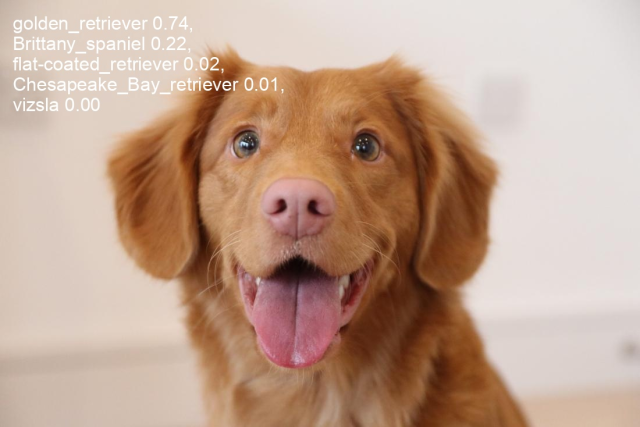

In [ ]:
# Result output example
import cv2
import imutils
from google.colab.patches import cv2_imshow

img_path ="/content/drive/MyDrive/YOLOv8/0_image_classification/runs/classify/predict/golden-retriever-puppy.jpg"

img = cv2.imread(img_path)
img = imutils.resize(img, width=640)
cv2_imshow(img)

In [13]:
import numpy as np

from ultralytics import YOLO

img_path = "runs/classify/predict/golden-retriever-puppy.jpg"
model_path = "yolov8l-cls.pt"

model = YOLO(model_path)    # Yolo Model
results = model(img_path)     # Image path

class_dict = results[0].names
probs = results[0].probs.data.tolist()

print("Classes : ", class_dict)
print("Probabilities : ", probs)

print("Best Prob : ", class_dict[np.argmax(probs)])


image 1/1 /content/drive/MyDrive/YOLOv8/0_image_classification/runs/classify/predict/golden-retriever-puppy.jpg: 224x224 golden_retriever 0.86, Brittany_spaniel 0.11, flat-coated_retriever 0.02, Chesapeake_Bay_retriever 0.01, vizsla 0.00, 11.2ms
Speed: 14.0ms preprocess, 11.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Classes :  {0: 'tench', 1: 'goldfish', 2: 'great_white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'electric_ray', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_tur

## Model Training

In [ ]:
# unzip
!unzip data/covid_classification.zip -d ./data/

In [ ]:
# training
!yolo classify train model=yolov8l-cls.pt data=data/covid_classification imgsz=224 workers=8 batch=16 device=0 epochs=25 name="yolov8_classification"

In [ ]:
# if the training be interrupted to continue training
!yolo classify train model=runs/classify/yolov8_classification/weights/last.pt resume=True

## Covid Classification / Prediction

In [ ]:
# Prediction with CLI

!yolo classify predict model=runs/classify/yolov8_classification/weights/best.pt source=inference save=True


image 1/1 /content/drive/MyDrive/YOLOv8/0_image_classification/inference/COVID-654.png: 224x224 covid 1.00, normal 0.00, viral_pneumonia 0.00, 10.8ms
Speed: 3.4ms preprocess, 10.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Classes :  {0: 'covid', 1: 'normal', 2: 'viral_pneumonia'}
Probabilities :  [0.9999991655349731, 7.854630439396715e-07, 6.898758897477819e-09]
Best Prob :  covid


array([[[12, 12, 12],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [17, 17, 17]],

       [[12, 12, 12],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [17, 17, 17]],

       [[12, 12, 12],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [ 8,  8,  8],
        [ 9,  9,  9],
        [17, 17, 17]],

       ...,

       [[11, 11, 11],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [ 5,  5,  5],
        [ 7,  7,  7],
        [14, 14, 14]],

       [[11, 11, 11],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [ 5,  5,  5],
        [ 7,  7,  7],
        [14, 14, 14]],

       [[11, 11, 11],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [14, 14, 14]]], dtype=uint8)
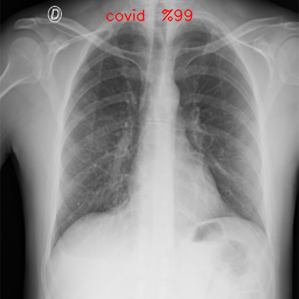

In [14]:
# Prediction with Pyhton

import numpy as np
import cv2

from ultralytics import YOLO

img_path = "inference/COVID-654.png"
model_path ="runs/classify/yolov8_classification/weights/best.pt"

model = YOLO(model_path)    # Yolo Model
results = model(img_path)     # Image path

class_dict = results[0].names
probs = results[0].probs.data.tolist()

print("Classes : ", class_dict)
print("Probabilities : ", probs)

print("Best Prob : ", class_dict[np.argmax(probs)])

name = class_dict[np.argmax(probs)]
max_prob = int(np.max(probs) * 100)

text = name + "  %" + str(max_prob)

img = cv2.imread(img_path)
cv2.putText(img, text, (105,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA )